In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler


# 1 : Veri al (e.g., UGRansome dataset)

pd.set_option("expand_frame_repr", False)
df= pd.read_csv('/kaggle/input/ugransome-dataset/final(2).csv')
df2 = pd.DataFrame(df)
df2.columns = ['Time','Protocol','Flag','Family','Clusters','SeedAddress','ExpAddress','BTC','USD','Netflow_Bytes','IPaddress','Threats','Port','Prediction']
df2


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,Time,Protocol,Flag,Family,Clusters,SeedAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port,Prediction
0,50,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,500,5,A,Bonet,5061,SS
1,40,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,504,8,A,Bonet,5061,SS
2,30,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,508,7,A,Bonet,5061,SS
3,20,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,512,15,A,Bonet,5061,SS
4,57,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,516,9,A,Bonet,5061,SS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149038,33,UDP,AP,TowerWeb,3,1AEoiHYZ,1SYSTEMQ,1010,1590,3340,A,Scan,5062,A
149039,33,UDP,AP,TowerWeb,3,1AEoiHYZ,1SYSTEMQ,1014,1596,3351,A,Scan,5062,A
149040,33,UDP,AP,TowerWeb,3,1AEoiHYZ,1SYSTEMQ,1018,1602,3362,A,Scan,5062,A
149041,33,UDP,AP,TowerWeb,3,1AEoiHYZ,1SYSTEMQ,1022,1608,3373,A,Scan,5062,A


In [2]:
# veri temizle düzelt
# Renaming the attack "Bonet" to "Botnet"

df2['Threats'] = df2['Threats'].str.replace('Bonet', 'Botnet')

# DataFrame yazdır
df2

,Time,Protocol,Flag,Family,Clusters,SeedAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port,Prediction
0,50,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,500,5,A,Botnet,5061,SS
1,40,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,504,8,A,Botnet,5061,SS
2,30,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,508,7,A,Botnet,5061,SS
3,20,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,512,15,A,Botnet,5061,SS
4,57,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,516,9,A,Botnet,5061,SS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149038,33,UDP,AP,TowerWeb,3,1AEoiHYZ,1SYSTEMQ,1010,1590,3340,A,Scan,5062,A
149039,33,UDP,AP,TowerWeb,3,1AEoiHYZ,1SYSTEMQ,1014,1596,3351,A,Scan,5062,A
149040,33,UDP,AP,TowerWeb,3,1AEoiHYZ,1SYSTEMQ,1018,1602,3362,A,Scan,5062,A
149041,33,UDP,AP,TowerWeb,3,1AEoiHYZ,1SYSTEMQ,1022,1608,3373,A,Scan,5062,A


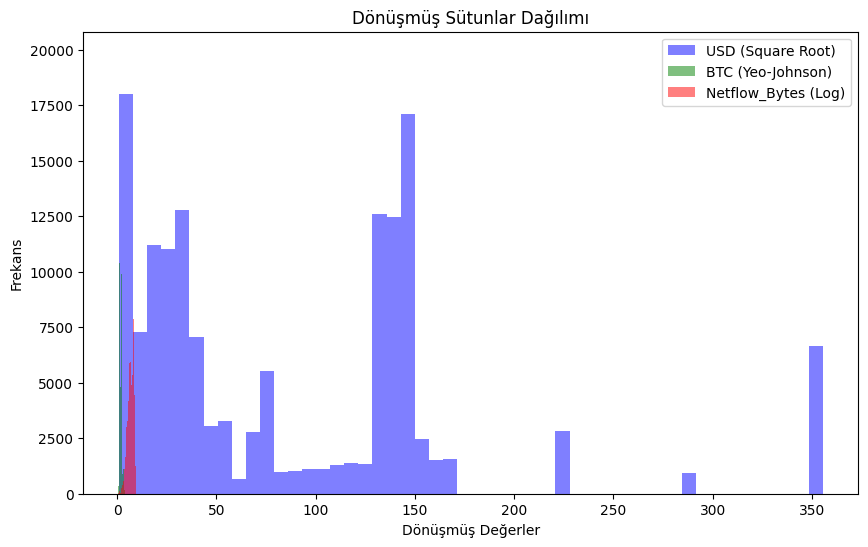

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


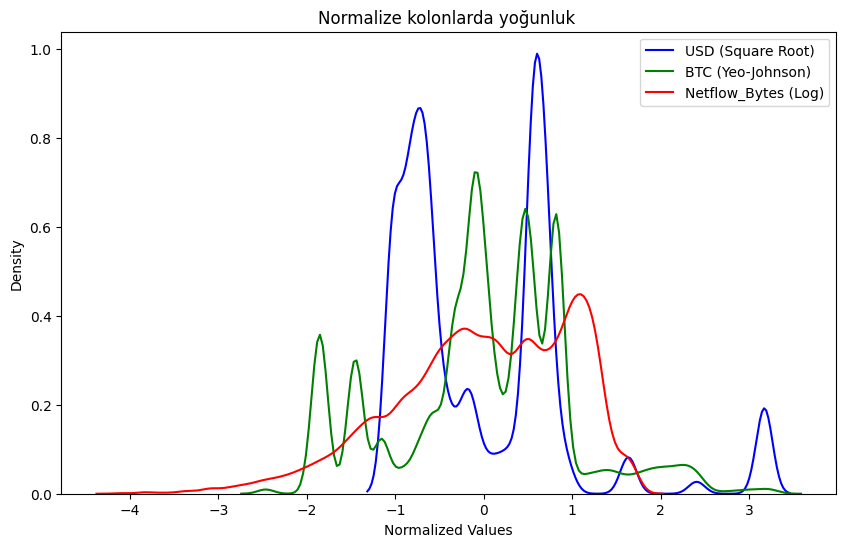

In [3]:
# 2: Veri önişleme (feature engineering and data transformation)

# tüm tekrarlayan satırları sil----- #

df2 = df2.drop_duplicates()

# --- time kolonu eksideğerler düzeltilir  --- #

df2['Time'] = df2['Time'] + 11

# 'df2' DataFrame'inin 'Time' sütunundaki her bir değere 11 ekliyor. 
#Başka bir deyişle, 'Time' sütunundaki tüm değerler üzerinde eleman bazında bir toplama işlemi gerçekleştiriyor, 
#her değeri 11 birim artırma. Bu genellikle zaman veya sayısal değerleri kaydırmak veya ayarlamak için veri manipülasyonunda yapılır 
#sabit bir miktarla

# --- Çarpıklığı azaltmak için matematiksel dönüşümler --- #

# --- NETFLOW_BYTES sütununa uygulanan log dönüşümü --- #
# Log dönüşümü, belirli bir sütun veya özellikteki her bir veri noktasının doğal logaritmasının (e tabanı) alınmasını içerir.
#Logaritmik dönüşümler genellikle uç değerlerin (aykırı değerler) etkisini azaltmak ve verileri daha uyumlu hale getirmek için kullanılır 
#normal dağılıma yakındır. Pozitif çarpık verilerle uğraşırken özellikle kullanışlıdırlar, 
#Dağılımın kuyruğunun sağ tarafta uzadığı yerde.


#np.log() işlevi Python'da logaritmik dönüşüm gerçekleştirmenin yaygın bir yoludur. 
#Veri noktalarına eklenen + 1, genellikle sıfır veya negatif değerlerin logaritmasının alınmasıyla ilgili sorunları önlemek için kullanılır. 
#Logaritmayı uygulamadan önce verilere 1 gibi küçük bir sabit eklemek yaygın bir uygulamadır.

#Bir özelliğe log dönüşümü uygulayarak, esasen o özellikteki değer aralığını sıkıştırmış olursunuz, 
#Verilerin sağa doğru eğim gösterdiği durumlarda yardımcı olabilir, bu da belirli analiz türleri için daha uygun hale getirir 
#veya normal dağılımlı verileri varsayan modelleme teknikleri.


df2['Netflow_Bytes'] = np.log(df2['Netflow_Bytes']+1)


# --- Sütunlara uygulanan karekök dönüşümü USD ---#


#Kare Kök Dönüşümü: veri tabanındaki her bir veri noktasının karekökünün alınmasını içerir. 
#belirtilen sütun: 'USD' sütununa uygulanır.

#Kare kök dönüşümleri, sağa çarpık verilerin etkisini azaltmak için kullanılan bir matematiksel dönüşüm türüdür. 
#Tıpkı logaritmik dönüşümler gibi, karekök dönüşümleri de verileri daha simetrik hale getirmeye yardımcı olabilir ve 
#normal dağılım.

#np.sqrt() işlevi karekökü hesaplamak için kullanılır.
#Kod, 'USD' sütununa bir karekök dönüşümü uygulayarak veri dağılımını daha az çarpık hale getirmeye çalışmaktadır 
#ve normal dağılımlı verileri varsayan belirli istatistiksel analizler veya modelleme teknikleri için daha uygundur veya 
#verilerin daha simetrik olmasını gerektirir. Veri kalitesini artırmak için veri ön işlemede kullanılan yaygın bir tekniktir. 
#analiz veya modelleme




df2['USD'] = np.sqrt(df2['USD'])

# --- Yeo Johnson dönüşümü BTC sütunlarına uygulandı ##


#DataFrame'deki (df2['BTC']) 'BTC' sütununa 
#Yeo-Johnson dönüşümü uygulanmaktadır. 
#Bu dönüşüm, 'BTC' sütunundaki verileri değiştirerek dağılımını daha normalize veya simetrik hale getirmek için kullanılır
#Yeo-Johnson dönüşümü, verilerin dağılımını değiştirmek için kullanılan matematiksel bir dönüşüm tekniğidir. 
#Hem pozitif hem de negatif değerlere uygulanabilir ve Box-Cox dönüşümü gibi diğer bazı dönüşümlerden daha çok yönlüdür.

#Dönüşüm, SciPy gibi bir kütüphaneden stats.yeojohnson() fonksiyonu kullanılarak gerçekleştirilir


df2['BTC'], _ = stats.yeojohnson(df2['BTC'])


#--dönüştürülmüş veriyi çiz--#

fig, ax = plt.subplots(figsize=(10, 6))

# 'USD' kolon histogramı
ax.hist(df2['USD'], bins=50, alpha=0.5, color='blue', label='USD (Square Root)')

#  'BTC' kolonu histogramı
ax.hist(df2['BTC'], bins=50, alpha=0.5, color='green', label='BTC (Yeo-Johnson)')

# 'Netflow_Bytes' kolonu histogram barı
ax.hist(df2['Netflow_Bytes'], bins=50, alpha=0.5, color='red', label='Netflow_Bytes (Log)')

# Add labels and a legend
ax.set_xlabel('Dönüşmüş Değerler')
ax.set_ylabel('Frekans')
ax.set_title('Dönüşmüş Sütunlar Dağılımı')
ax.legend()

# çizimi göster
plt.show()




# Çizim eksenleri ve şekli 
fig, ax = plt.subplots(figsize=(10, 6))


# Bir StandardScaler örneği oluşturun
# StandardScaler, makine öğrenimi ve veri analizinde kullanılan yaygın bir ön işleme tekniğidir. 
#Bir veri kümesinin özelliklerini, ortalaması 0 ve standardı 0 olacak şekilde ölçeklendirerek 
#standartlaştırmak veya normalleştirmek için kullanılır.
#1'lik sapma.


#Özellikleri standartlaştırmak yararlıdır çünkü özellikle algoritmalarda farklı özellikleri daha doğrudan 
#karşılaştırılabilir hale getirir 

# ölçekleyici StandardScaler sınıfının bir örneği olarak oluşturulur ve daha sonra standartlaştırmak için kullanılabilir 
#fit_transform yöntemini kullanarak df2 DataFrame'de belirtilen sütunları, sonraki kodda görüldüğü gibi

scaler = StandardScaler()

# Normalize özellikler
df2_normalized = df2.copy()
df2_normalized[['USD', 'BTC', 'Netflow_Bytes']] = scaler.fit_transform(df2[['USD', 'BTC', 'Netflow_Bytes']])

#normalize 'USD' kolonu yoğunluğu
sns.kdeplot(df2_normalized['USD'], color='blue', label='USD (Square Root)', ax=ax)

#  normalize 'BTC' kolonu yoğunluğu
sns.kdeplot(df2_normalized['BTC'], color='green', label='BTC (Yeo-Johnson)', ax=ax)

#  normalize 'Netflow_Bytes' kolonu yoğunluğu
sns.kdeplot(df2_normalized['Netflow_Bytes'], color='red', label='Netflow_Bytes (Log)', ax=ax)

# Etiket ve eksen
ax.set_xlabel('Normalized Values')
ax.set_ylabel('Density')
ax.set_title('Normalize kolonlarda yoğunluk ')
ax.legend()

# çizim
plt.show()





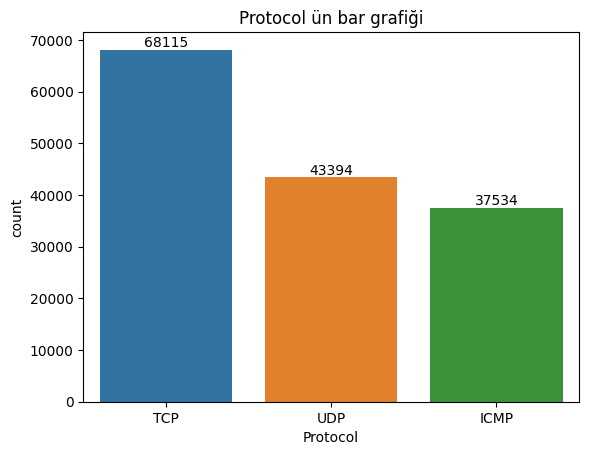

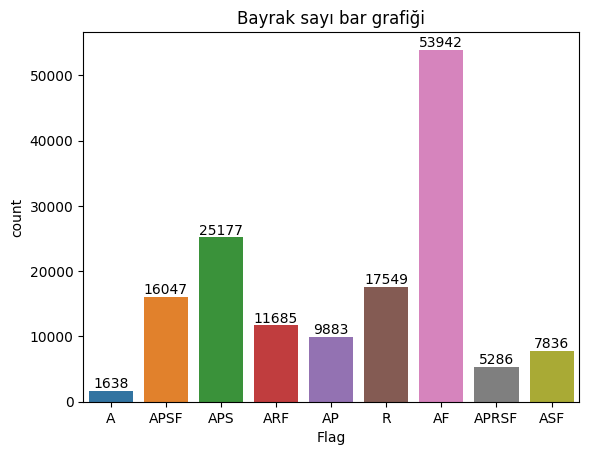

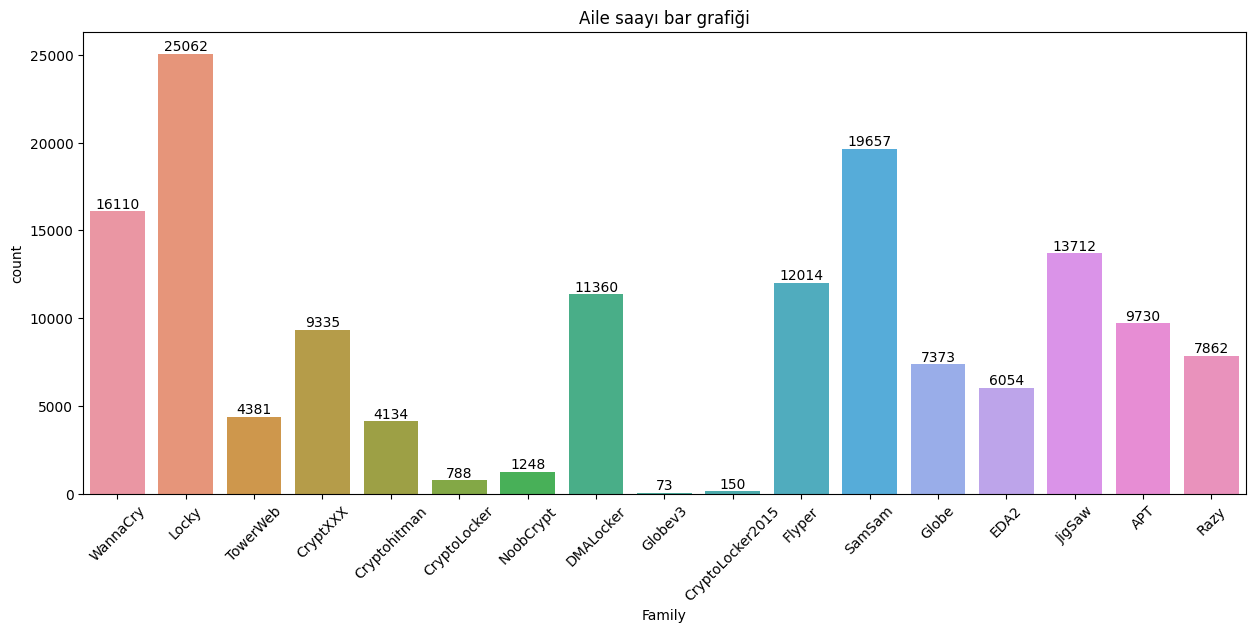

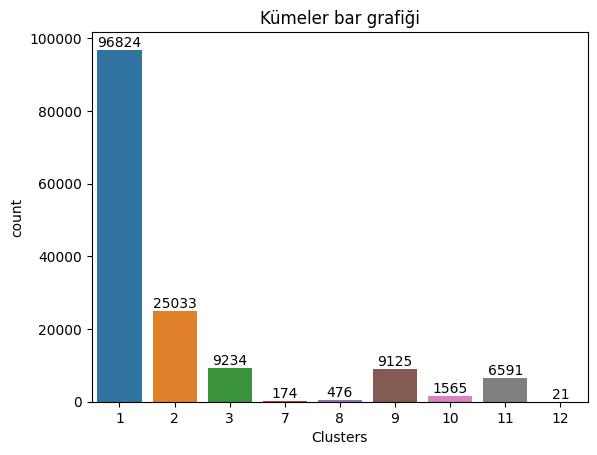

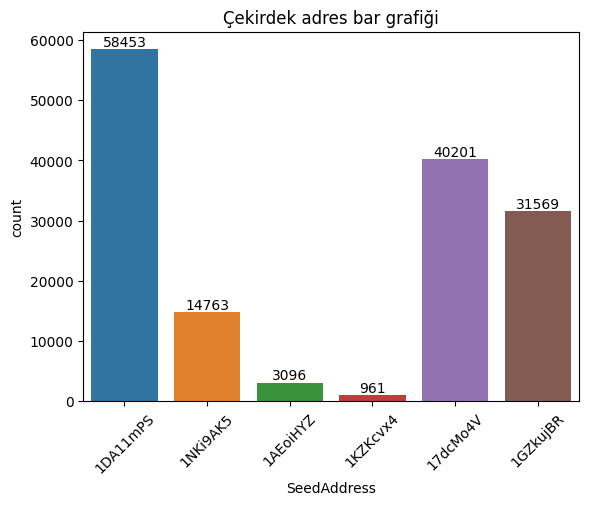

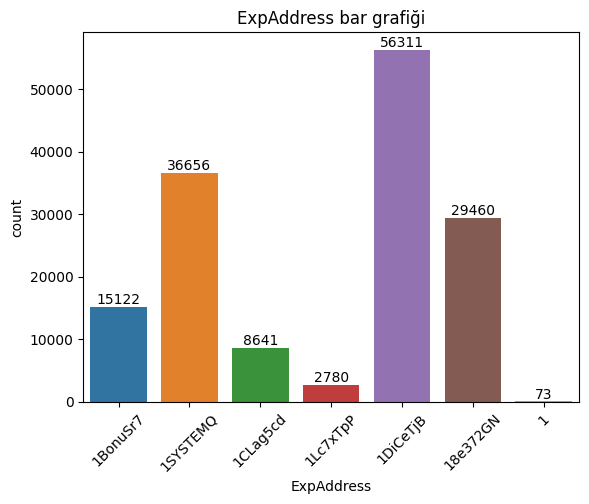

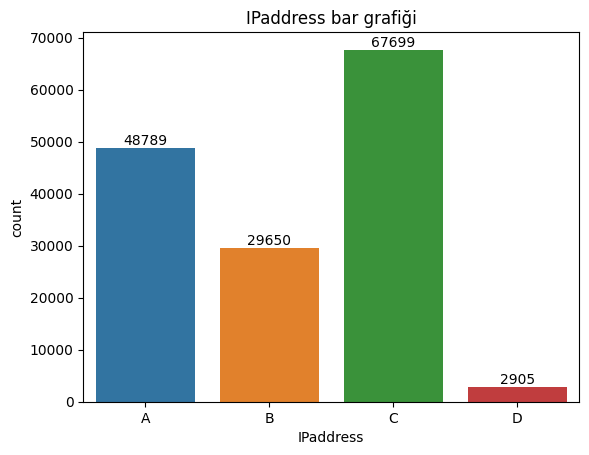

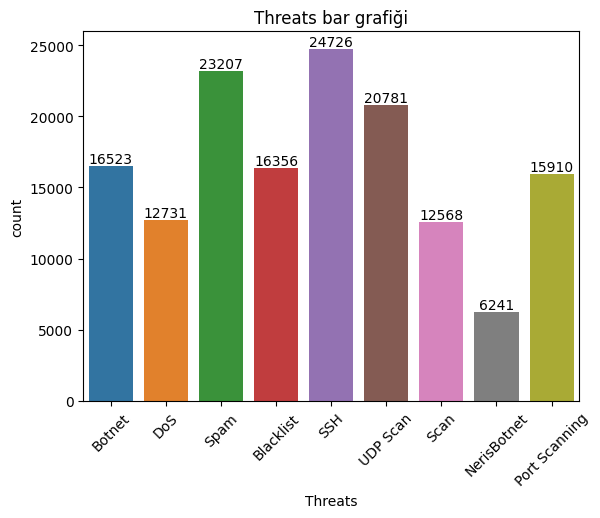

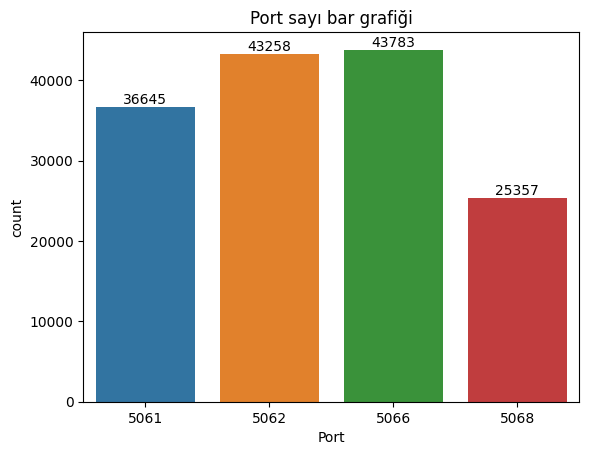

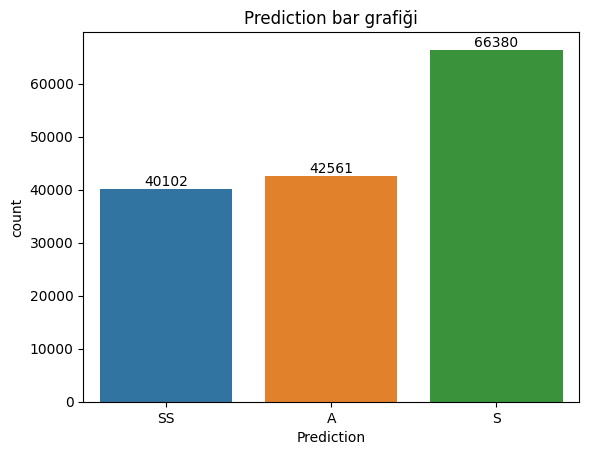

In [4]:
# 3: Veri Görselleştirme

# --- Görselleştirmeleri sayın --- #

# Kategorik sayım görselleştirmeleri

# Protokol sayısı

ax = sns.countplot(x=df2['Protocol'], data=df2)
plt.title('Protocol ün bar grafiği')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# bayrak sayı

ax = sns.countplot(x=df2['Flag'], data=df2)
plt.title('Bayrak sayı bar grafiği')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# aile sayı

plt.figure(figsize=(15, 6))
ax = sns.countplot(x=df2['Family'], data=df2)
plt.title('Aile saayı bar grafiği')
plt.xticks(rotation=45)
plt.xticks(fontsize=10)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# kümeler sayı

ax = sns.countplot(x=df2['Clusters'], data=df2)
plt.title('Kümeler bar grafiği')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# çekirdek adres sayı

ax = sns.countplot(x=df2['SeedAddress'], data=df2)
plt.title('Çekirdek adres bar grafiği')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# ExpAddress sayı

ax = sns.countplot(x=df2['ExpAddress'], data=df2)
plt.title('ExpAddress bar grafiği')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# IPaddress sayı

ax = sns.countplot(x=df2['IPaddress'], data=df2)
plt.title('IPaddress bar grafiği')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# iplikler sayı

ax = sns.countplot(x=df2['Threats'], data=df2)
plt.title('Threats bar grafiği')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# Port sayı

ax = sns.countplot(x=df2['Port'], data=df2)
plt.title('Port sayı bar grafiği')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# Prediction sayi

ax = sns.countplot(x=df2['Prediction'], data=df2)
plt.title('Prediction bar grafiği')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


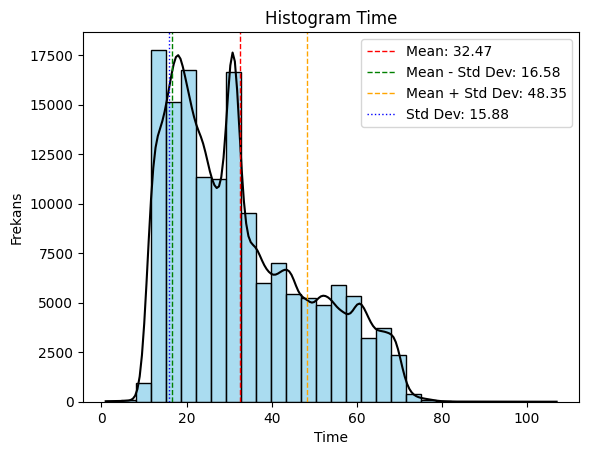

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


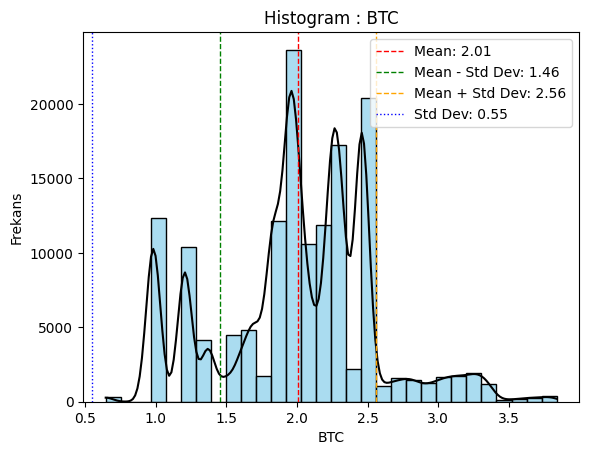

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


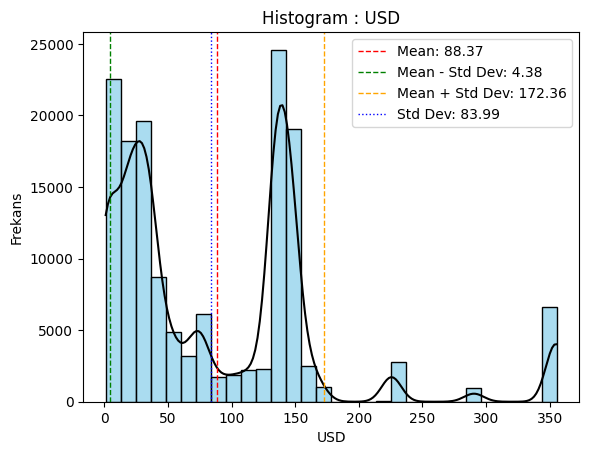

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


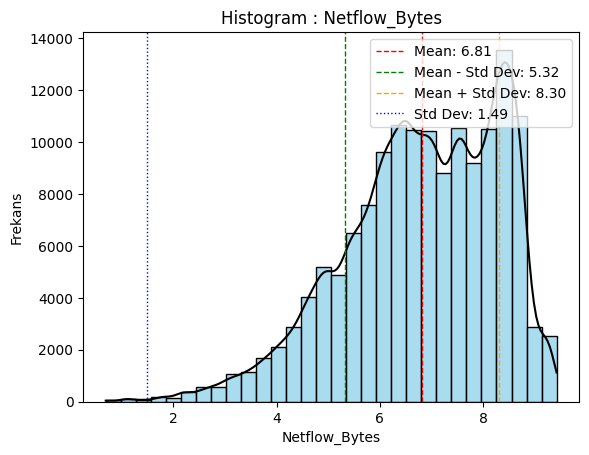

In [5]:
# --- Sayısal gösterimler (count, mean and standard deviation) --- #

# Time

feature = 'Time'
data = df2[feature]
mean = np.mean(data)
std_dev = np.std(data)

ax = sns.histplot(data, bins=30, kde=True, color='skyblue', edgecolor='black', alpha=0.7)
ax.lines[0].set_color('black')

plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean:.2f}')
plt.axvline(mean - std_dev, color='green', linestyle='dashed', linewidth=1, label=f'Mean - Std Dev: {mean - std_dev:.2f}')
plt.axvline(mean + std_dev, color='orange', linestyle='dashed', linewidth=1, label=f'Mean + Std Dev: {mean + std_dev:.2f}')
plt.axvline(std_dev, color='blue', linestyle='dotted', linewidth=1, label=f'Std Dev: {std_dev:.2f}')

plt.legend(loc='upper right')

plt.title(f'Histogram {feature}')
plt.xlabel(feature)
plt.ylabel('Frekans')
plt.show()

# # BTC

feature = 'BTC'
data = df2[feature]
mean = np.mean(data)
std_dev = np.std(data)

ax = sns.histplot(data, bins=30, kde=True, color='skyblue', edgecolor='black', alpha=0.7)
ax.lines[0].set_color('black')

plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean:.2f}')
plt.axvline(mean - std_dev, color='green', linestyle='dashed', linewidth=1, label=f'Mean - Std Dev: {mean - std_dev:.2f}')
plt.axvline(mean + std_dev, color='orange', linestyle='dashed', linewidth=1, label=f'Mean + Std Dev: {mean + std_dev:.2f}')
plt.axvline(std_dev, color='blue', linestyle='dotted', linewidth=1, label=f'Std Dev: {std_dev:.2f}')

plt.legend(loc='upper right')

plt.title(f'Histogram : {feature}')
plt.xlabel(feature)
plt.ylabel('Frekans')
plt.show()

# # USD

feature = 'USD'
data = df2[feature]
mean = np.mean(data)
std_dev = np.std(data)

ax = sns.histplot(data, bins=30, kde=True, color='skyblue', edgecolor='black', alpha=0.7)
ax.lines[0].set_color('black')

plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean:.2f}')
plt.axvline(mean - std_dev, color='green', linestyle='dashed', linewidth=1, label=f'Mean - Std Dev: {mean - std_dev:.2f}')
plt.axvline(mean + std_dev, color='orange', linestyle='dashed', linewidth=1, label=f'Mean + Std Dev: {mean + std_dev:.2f}')
plt.axvline(std_dev, color='blue', linestyle='dotted', linewidth=1, label=f'Std Dev: {std_dev:.2f}')

plt.legend(loc='upper right')

plt.title(f'Histogram : {feature}')
plt.xlabel(feature)
plt.ylabel('Frekans')
plt.show()

# Netflow_Bytes

feature = 'Netflow_Bytes'
data = df2[feature]
mean = np.mean(data)
std_dev = np.std(data)

ax = sns.histplot(data, bins=30, kde=True, color='skyblue', edgecolor='black', alpha=0.7)
ax.lines[0].set_color('black')

plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean:.2f}')
plt.axvline(mean - std_dev, color='green', linestyle='dashed', linewidth=1, label=f'Mean - Std Dev: {mean - std_dev:.2f}')
plt.axvline(mean + std_dev, color='orange', linestyle='dashed', linewidth=1, label=f'Mean + Std Dev: {mean + std_dev:.2f}')
plt.axvline(std_dev, color='blue', linestyle='dotted', linewidth=1, label=f'Std Dev: {std_dev:.2f}')

plt.legend(loc='upper right')

plt.title(f'Histogram : {feature}')
plt.xlabel(feature)
plt.ylabel('Frekans')
plt.show()

In [6]:
#Scikit-learn'deki ön işleme modülü, verilerinizi önceden işlemek için çeşitli araçlar ve teknikler sağlar 
#makine öğrenimi modellerine besler. 
#ön işleme, verilerinizin kalitesini ve modellerin performansını artırmak için çok önemlidir.

from sklearn import preprocessing 
#Kod segmenti, kategorik değişkenleri sayısal değerlere dönüştürmek için scikit-learn'in LabelEncoder'ını kullanır. 
#'Protokol', 'Bayrak', 'Aile', 'SeedAddress', 'ExpAddress', 'IPaddress', 'Tehditler' gibi her kategorik sütun 
#'Tahmin,' benzersiz sayısal etiketlere kodlanır. 
#ön işleme adımı, tipik olarak sayısal girdi verileri gerektirdiğinden, makine öğrenimi algoritmaları için çok önemlidir 
#kategorik etiketler yerine.


lab_encoder = preprocessing.LabelEncoder()                     # transformation of categorical to numeric
df2['Protocol'] = lab_encoder.fit_transform(df2['Protocol'])
df2['Flag'] = lab_encoder.fit_transform(df2['Flag'])
df2['Family'] = lab_encoder.fit_transform(df2['Family'])

df2['SeedAddress'] = lab_encoder.fit_transform(df2['SeedAddress'])
df2['ExpAddress'] = lab_encoder.fit_transform(df2['ExpAddress'])
df2['IPaddress'] = lab_encoder.fit_transform(df2['IPaddress'])
df2['Threats'] = lab_encoder.fit_transform(df2['Threats'])
df2['Prediction'] = lab_encoder.fit_transform(df2['Prediction'])
df2

,Time,Protocol,Flag,Family,Clusters,SeedAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port,Prediction
0,61,1,0,16,1,2,2,0.645909,22.360680,1.791759,0,1,5061,2
1,51,1,0,16,1,2,2,0.645909,22.449944,2.197225,0,1,5061,2
2,41,1,0,16,1,2,2,0.645909,22.538855,2.079442,0,1,5061,2
3,31,1,0,16,1,2,2,0.645909,22.627417,2.772589,0,1,5061,2
4,68,1,0,16,1,2,2,0.645909,22.715633,2.302585,0,1,5061,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149038,44,2,2,15,3,1,6,3.686013,39.874804,8.114025,0,6,5062,0
149039,44,2,2,15,3,1,6,3.686961,39.949969,8.117312,0,6,5062,0
149040,44,2,2,15,3,1,6,3.687905,40.024992,8.120589,0,6,5062,0
149041,44,2,2,15,3,1,6,3.688844,40.099875,8.123854,0,6,5062,0


In [7]:
#scikit-learn'in train_test_split işlevi bir veri kümesini iki alt kümeye ayırmak için kullanılır: 
#bir eğitim seti ve bir test (veya doğrulama) seti. Bu fonksiyon makine öğreniminde yaygın olarak kullanılır 
#görülmemiş veriler üzerinde bir modelin performansını değerlendirmek için. Genellikle özellikler (X) olarak temsil edilen veri kümesini girdi olarak alır 
#ve etiketler (y) olarak ayırır ve modeli eğitmek için kullanılan eğitim verilerine (X_train ve y_train) ve 
#Modelin performansını değerlendirmek için kullanılan #test verileri (X_test ve y_test).

from sklearn.model_selection import train_test_split  # library for machine learning models 


#train_test_split işlevini kullanarak bir veri kümesini eğitim ve test kümelerine bölmek için makine öğreniminde yaygın prosedür
#scikit-learn'den. İşte her bir kod satırının ne yaptığının bir dökümü:

X = df2.iloc[:, :-1] # df2 DataFrame'inin son sütunu hariç tüm satırlarını ve tüm sütunlarını seçer. 
#Son sütunun hedef değişkeni veya etiketleri içerdiği ve X'in tüm özellik sütunlarını içereceği varsayılmaktadır
y = df2.iloc[:, -1]  #  satırlarda DataFrame df2'nin yalnızca son sütununu seçer. 
#Bu, hedef değişkeni veya etiketleri izole etmek içindir ve y bu etiketleri içerecektir.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)  #test ve eğitimi 4 parçaya bölün
#Bu satır, verileri eğitim ve test kümelerine ayırmak için train_test_split işlevini kullanır. 
#İşte parametrelerin bir dökümü:

#X ve y: Özellik matrisi ve hedef değişken.
#train_size=0.8: Bu parametre, verilerin %80'inin eğitim için kullanılması gerektiğini belirtir 
#(bu yüzdeyi gerektiği gibi ayarlayabiliriz).
#random_state=42: Bu parametre tekrarlanabilirlik için rastgele tohumu ayarlar ve bölünmenin her seferinde aynı olmasını sağlar. 
#Kodu çalıştır.

#Bu kodu çalıştırdıktan sonra:

#X_train: Eğitim için özellik matrisi.
#X_test: Test için özellik matrisi.
#y_train: Eğitim için hedef değişken.
#y_test: Test için hedef değişken.

#Bu alt kümeler daha sonra makine öğrenimi modellerinizi eğitmek ve değerlendirmek için kullanılır.

In [8]:
X_train
X_test
y_train
y_test


42916     1
45544     2
137525    0
108170    1
85804     2
         ..
91256     1
132188    1
94999     2
3431      0
147946    0
Name: Prediction, Length: 29809, dtype: int64

In [9]:
#%time komutu genellikle Jupyter Notebook veya JupyterLab gibi Jupyter Notebook ortamlarında kullanılır. 
#Buna “sihirli komut” denir ve belirli bir kod hücresinin yürütme süresini ölçmek için kullanılır. 
#Bir hücrenin başına %%time eklediğinizde, Jupyter'a içindeki kodu çalıştırmak için gereken süreyi ölçmesini söyler 
#bu hücre
#%%zaman


# Python'da makine öğrenimi modelleri oluşturmak ve değerlendirmek için çeşitli kütüphaneleri ve araçları içe aktarın
# İçe aktarılan modeller: topluluk, rastgele orman, SVM, Naive Bayes, genetik algoritma
# İçe aktarılan değerlendirme metrikleri: doğruluk, kesinlik, geri çağırma, f1 puanı
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

from sklearn.ensemble import StackingClassifier #ensmbl method of stacking classify for ensmbling
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 


from sklearn.tree import DecisionTreeClassifier   #estimator in GA
import numpy as np

import warnings
warnings.filterwarnings('ignore') 

In [10]:
rf = RandomForestClassifier(n_estimators=100, random_state=42) #  Rastgele Orman'daki ağaç sayısını belirtir. 
#Bu durumda, ormanda 100 ağaç vardır

# random_state: Bu parametre, tekrarlanabilirlik için rastgele tohumu ayarlamak için kullanılır. 
#42 olarak ayarlandığında, kod her çalıştırıldığında rastgeleleştirme işlemi aynı olacaktır,
#Rastgele Orman modeli için tutarlı sonuçlar sağlamak.

rf.fit(X_train, y_train)

rf_pred=rf.predict(X_test)

#Bu kod parçacığı, test verileri (X_test) üzerinde tahminler yapmak için eğitilmiş Rastgele Orman sınıflandırıcısını (rf) kullanır. 
#predict yöntemi X_test içindeki test özelliklerini girdi olarak alır ve bu özellikler için tahmini etiketler üretir. 
#Tahminler rf_pred değişkeninde saklanır ve bu değişken daha ileri değerlendirme veya analiz için kullanılabilir. 
#model görünmeyen veriler üzerinde performans gösterir.


rf_accuracy = accuracy_score(rf_pred, y_test)
rf_report = classification_report(rf_pred, y_test)
rf_matrix = confusion_matrix(rf_pred, y_test)
print('Random Forest doğruluğu: ', round(rf_accuracy, 3))
print('Random Forest sınıflandırma raporu: \n', rf_report)
print('Random Forest karmaşıklık matrisi: \n', rf_matrix)




#Modelin tahminlerinin doğruluğunu hesaplamak için scikit-learn'in accuracy_score işlevi kullanılır (rf_pred) 
#gerçek etiketlerle karşılaştırıldığında (y_test). Bu puan, doğru sınıflandırılmış örneklerin oranını ölçer.
#classification_report: classification_report işlevi, kesinlik, geri çağırma içeren kapsamlı bir rapor oluşturur, 
#F1-skoru ve sınıflandırma problemindeki her sınıf için destek. Modelin performansına ilişkin ayrıntılı bilgiler sağlar. 

#confusion_matrix: confusion_matrix işlevi, sınıflandırma sonuçları için gerçek pozitif, gerçek negatifi özetleyen bir karışıklık matrisi hesaplar, 
 #yanlış pozitif ve yanlış negatif sayıları. Modelin ne kadar iyi olduğunu anlamaya yardımcı olur 
#performans ve nerede hata yapıyor gibi.

# Rastgele Orman modeli için doğruluk, sınıflandırma raporu ve karışıklık matrisini yazdırır, 
#test verileri üzerindeki performansını değerlendirme yapılır.

Random Forest doğruluğu:  0.994
Random Forest sınıflandırma raporu: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      8400
           1       0.99      0.99      0.99     13359
           2       1.00      0.99      0.99      8050

    accuracy                           0.99     29809
   macro avg       0.99      0.99      0.99     29809
weighted avg       0.99      0.99      0.99     29809

Random Forest karmaşıklık matrisi: 
 [[ 8346    49     5]
 [   49 13280    30]
 [    8    44  7998]]


In [11]:
svr = LinearSVC()
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)



#Doğrusal çekirdeğe sahip bir Destek Vektör Makinesi (DVM) sınıflandırıcısı (LinearSVC) aşağıdaki adımlar kullanılarak eğitilir ve test edilir:

#svr = LinearSVC(): LinearSVC sınıflandırıcısının bir örneği oluşturulur.

#svr.fit(X_train, y_train): LinearSVC sınıflandırıcısı eğitim verileri (X_train ve y_train) üzerinde eğitilir. 
#Bu adım, marjı maksimize ederken farklı sınıfların veri noktalarını en iyi şekilde ayıran hiper düzlemi bulmayı içerir
#aralarında.

#svr_pred = svr.predict(X_test): Eğitilen DVM sınıflandırıcısı test verileri (X_test) üzerinde tahminler yapmak için kullanılır. 
#Bu tahminler svr_pred değişkeninde saklanır.



svr_accuracy = accuracy_score(svr_pred, y_test)
svr_report = classification_report(svr_pred, y_test)
svr_matrix = confusion_matrix(svr_pred, y_test)
print('SVM  doğruluğu: ', round(svr_accuracy, 3))
print(' SVM sınıflandırma raporu: \n', svr_report)
print(' SVM karmaşıklık matrisi:\n', svr_matrix)







#svr_accuracy = accuracy_score(svr_pred, y_test): DVM sınıflandırıcısının test verileri (svr_pred) üzerindeki tahminlerinin doğruluğu 
#gerçek etiketlerle (y_test) karşılaştırılarak hesaplanır. Sonuç svr_accuracy değişkeninde saklanır.

#svr_rapor = classification_report(svr_pred, y_test): classification_report işlevi ayrıntılı bir rapor oluşturmak için kullanılır 
#Her sınıf için kesinlik, geri çağırma, F1 puanı ve destek gibi metrikleri içeren #sınıflandırma raporu. 
#Bu rapor svr_report değişkeninde saklanır.

#svr_matrix = confusion_matrix(svr_pred, y_test): Karışıklık matrisi, tahminlere (svr_pred) dayalı olarak hesaplanır ve 
#true labels (y_test). Karışıklık matrisi, doğru pozitif, doğru negatif sayısı hakkında bilgi sağlar, 
#yanlış pozitif ve yanlış negatif tahminler. svr_matrix değişkeninde saklanır.

#Son olarak, sonuçlar print deyimleri kullanılarak yazdırılır:

#DVM sınıflandırıcısının doğruluğu yuvarlatılmış bir değerle yazdırılır.
#Her sınıf için kesinlik, geri çağırma, F1 puanı ve desteği içeren sınıflandırma raporu yazdırılır.
#Doğru ve yanlış tahminlerin dağılımını gösteren karışıklık matrisi yazdırılır.
#Bu metrikler, SVM sınıflandırıcısının performansını, veri noktalarını farklı sınıflara doğru şekilde sınıflandırma yeteneği açısından değerlendirmeye yardımcı olur.

SVM  doğruluğu:  0.667
 SVM sınıflandırma raporu: 
               precision    recall  f1-score   support

           0       0.63      0.69      0.65      7675
           1       0.97      0.64      0.77     20438
           2       0.20      0.93      0.33      1696

    accuracy                           0.67     29809
   macro avg       0.60      0.75      0.58     29809
weighted avg       0.84      0.67      0.72     29809

 SVM karmaşıklık matrisi:
 [[ 5264   328  2083]
 [ 3040 13033  4365]
 [   99    12  1585]]


Naive Bayes doğruluğu :  0.777
Naive Bayes sınıflandırma raporu: 
               precision    recall  f1-score   support

           0       0.64      0.67      0.66      7993
           1       0.86      0.88      0.87     13191
           2       0.78      0.72      0.75      8625

    accuracy                           0.78     29809
   macro avg       0.76      0.76      0.76     29809
weighted avg       0.78      0.78      0.78     29809

Naive Bayes karmaşıklık matrisi:
 [[ 5380  1357  1256]
 [ 1109 11543   539]
 [ 1914   473  6238]]


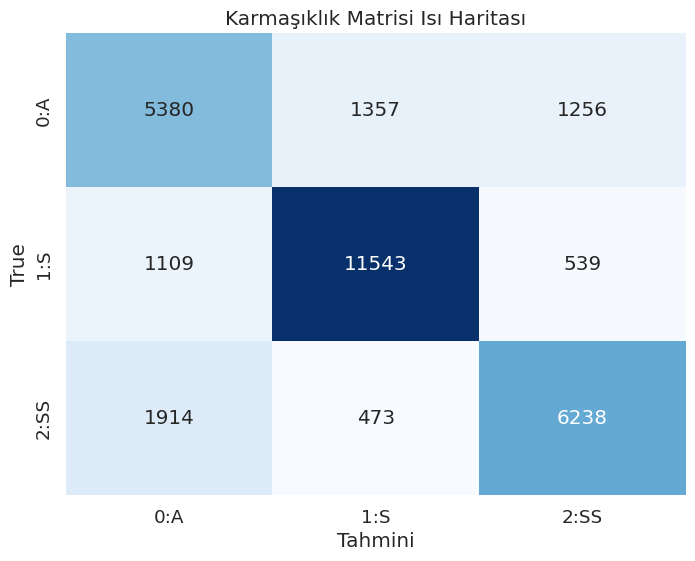

In [12]:
#Naive Bayes Algoritması

nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)


nb_accuracy = accuracy_score(nb_pred, y_test)
nb_report = classification_report(nb_pred, y_test)
nb_matrix = confusion_matrix(nb_pred, y_test)
print('Naive Bayes doğruluğu : ', round(nb_accuracy, 3))
print('Naive Bayes sınıflandırma raporu: \n', nb_report)
print('Naive Bayes karmaşıklık matrisi:\n', nb_matrix)



# Karışıklık matrisini ısı haritası olarak çizim
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  #okunabilirlik için font size ayarlaması
sns.heatmap(nb_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["0:A", "1:S", "2:SS"], yticklabels=["0:A", "1:S", "2:SS"])
plt.xlabel("Tahmini")
plt.ylabel("True")
plt.title("Karmaşıklık Matrisi Isı Haritası")
plt.show()




Naive Bayes doğruluğu :  0.777
Naive Bayes sınıflandırma raporu: 
 {'0': {'precision': 0.6402475306438177, 'recall': 0.6730889528337295, 'f1-score': 0.6562576238106855, 'support': 7993}, '1': {'precision': 0.8631571076048755, 'recall': 0.8750663331059055, 'f1-score': 0.8690709230537569, 'support': 13191}, '2': {'precision': 0.7765467446782024, 'recall': 0.7232463768115942, 'f1-score': 0.7489494537159324, 'support': 8625}, 'accuracy': 0.7769801066791908, 'macro avg': {'precision': 0.7599837943089652, 'recall': 0.757133887583743, 'f1-score': 0.7580926668601249, 'support': 29809}, 'weighted avg': {'precision': 0.7783259952263224, 'recall': 0.7769801066791908, 'f1-score': 0.7772508561649445, 'support': 29809}}
Naive Bayes karmaşıklık matrisi:
 [[ 5380  1357  1256]
 [ 1109 11543   539]
 [ 1914   473  6238]]


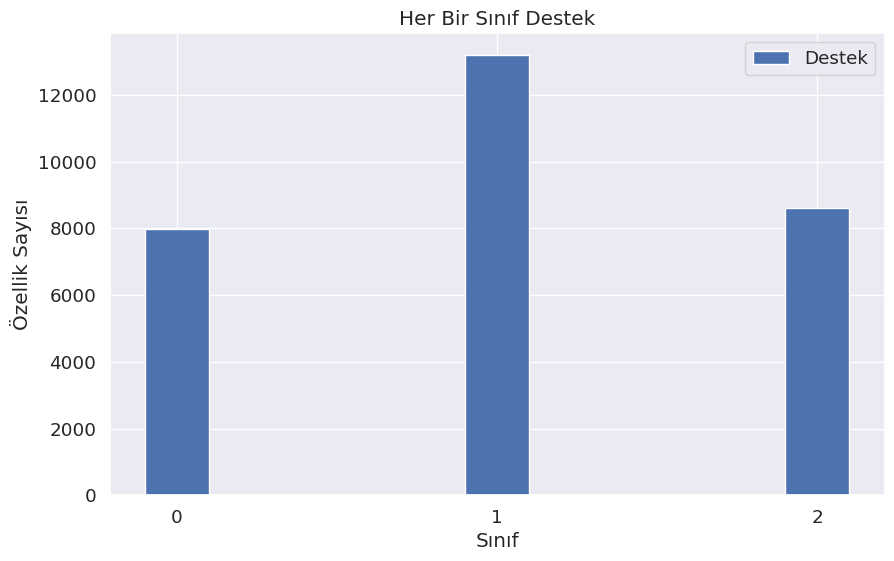

In [13]:
# Assuming you already have nb_pred and y_test defined

nb_accuracy = accuracy_score(nb_pred, y_test)
nb_report = classification_report(nb_pred, y_test, output_dict=True)  # Use output_dict=True to get metrics as a dictionary
nb_matrix = confusion_matrix(nb_pred, y_test)

# tüm sınıflar için destek çıkar
labels = [str(label) for label in np.unique(np.concatenate((nb_pred, y_test)))]  # Get all unique labels
support = [nb_report[label]['support'] if label in nb_report else 0 for label in labels]

print('Naive Bayes doğruluğu : ', round(nb_accuracy, 3))
print('Naive Bayes sınıflandırma raporu: \n', nb_report)
print('Naive Bayes karmaşıklık matrisi:\n', nb_matrix)

# Plot support
plt.figure(figsize=(10, 6))
plt.bar(labels, support, width=0.2, label='Destek', align='center')

plt.xlabel('Sınıf')
plt.ylabel('Özellik Sayısı')
plt.xticks(labels)
plt.legend()
plt.title('Her Bir Sınıf Destek')
plt.show()

Naive Bayes doğruluğu :  0.777
Naive Bayes sınıflandırma raporu: 
 {'0': {'precision': 0.6402475306438177, 'recall': 0.6730889528337295, 'f1-score': 0.6562576238106855, 'support': 7993}, '1': {'precision': 0.8631571076048755, 'recall': 0.8750663331059055, 'f1-score': 0.8690709230537569, 'support': 13191}, '2': {'precision': 0.7765467446782024, 'recall': 0.7232463768115942, 'f1-score': 0.7489494537159324, 'support': 8625}, 'accuracy': 0.7769801066791908, 'macro avg': {'precision': 0.7599837943089652, 'recall': 0.757133887583743, 'f1-score': 0.7580926668601249, 'support': 29809}, 'weighted avg': {'precision': 0.7783259952263224, 'recall': 0.7769801066791908, 'f1-score': 0.7772508561649445, 'support': 29809}}


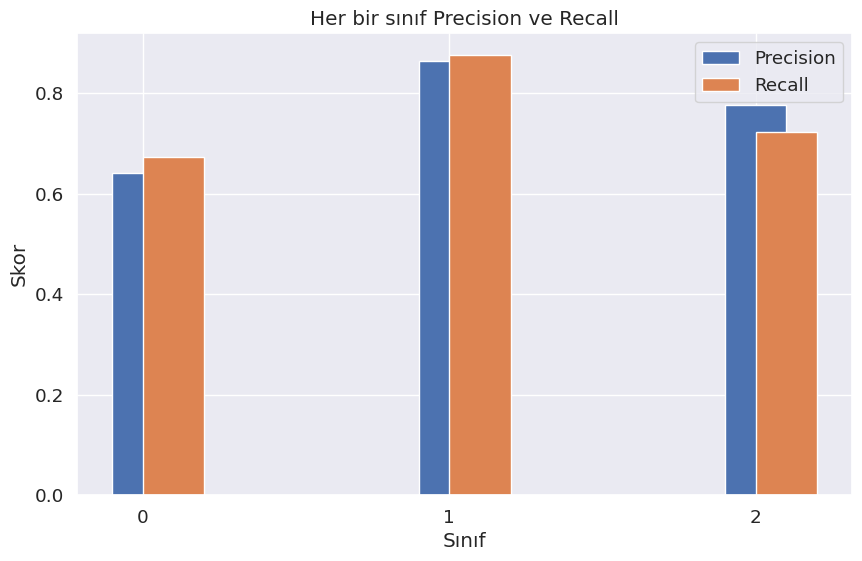

In [14]:
# Assuming you already have nb_pred and y_test defined

nb_accuracy = accuracy_score(nb_pred, y_test)
nb_report = classification_report(nb_pred, y_test, output_dict=True)  # Use output_dict=True to0 get metrics as a dictionary
nb_matrix = confusion_matrix(nb_pred, y_test)

# Extract precision and recall for all classes
labels = [str(label) for label in np.unique(np.concatenate((nb_pred, y_test)))]  # Get all unique labels
precision = [nb_report[label]['precision'] if label in nb_report else 0.0 for label in labels]
recall = [nb_report[label]['recall'] if label in nb_report else 0.0 for label in labels]

print('Naive Bayes doğruluğu : ', round(nb_accuracy, 3))
print('Naive Bayes sınıflandırma raporu: \n', nb_report)

# Plot precision and recall
plt.figure(figsize=(10, 6))
plt.bar(labels, precision, width=0.2, label='Precision', align='center')
plt.bar(labels, recall, width=0.2, label='Recall', align='edge')

plt.xlabel('Sınıf')
plt.ylabel('Skor')
plt.xticks(labels)
plt.legend()
plt.title('Her bir sınıf Precision ve Recall')
plt.show()

In [15]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=1000, random_state=42)),
    ('svr', LinearSVC(random_state=42))
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=GaussianNB())

"""
Bu kod parçacığı, scikit-learn kütüphanesinde bulunan StackingClassifier sınıfını kullanarak bir Yığınlama 
Sınıflandırıcısı (clf) tanımlamaktadır. Yığınlama, birden fazla temel tahmin ediciyi birleştirerek tahmin 
performansını artırmak için kullanılan bir topluluk öğrenme yöntemidir. Koddaki "estimators" adlı değişken, 
her bir temel tahmin edicinin adını ve nesnesini içeren bir tuple listesidir. İki temel tahmin edici 
olarak "rf" ve "svr" tanımlanmıştır. "clf" adlı Yığınlama Sınıflandırıcısı, StackingClassifier sınıfı 
kullanılarak oluşturulur ve "estimators" parametresi olarak temel tahmin edicilerin listesini alırken, 
"final_estimator" parametresi olarak Gaussian Naive Bayes (GaussianNB) sınıflandırıcısını kullanır. 
Yığınlama Sınıflandırıcısı, temel tahmin edicilerin tahminlerini birleştirerek nihai tahminleri elde 
eder ve sınıflandırma performansını artırmak için birden fazla sınıflandırıcının güçlü yönlerinden yararlanır.
"""

'\nBu kod parçacığı, scikit-learn kütüphanesinde bulunan StackingClassifier sınıfını kullanarak bir Yığınlama \nSınıflandırıcısı (clf) tanımlamaktadır. Yığınlama, birden fazla temel tahmin ediciyi birleştirerek tahmin \nperformansını artırmak için kullanılan bir topluluk öğrenme yöntemidir. Koddaki "estimators" adlı değişken, \nher bir temel tahmin edicinin adını ve nesnesini içeren bir tuple listesidir. İki temel tahmin edici \nolarak "rf" ve "svr" tanımlanmıştır. "clf" adlı Yığınlama Sınıflandırıcısı, StackingClassifier sınıfı \nkullanılarak oluşturulur ve "estimators" parametresi olarak temel tahmin edicilerin listesini alırken, \n"final_estimator" parametresi olarak Gaussian Naive Bayes (GaussianNB) sınıflandırıcısını kullanır. \nYığınlama Sınıflandırıcısı, temel tahmin edicilerin tahminlerini birleştirerek nihai tahminleri elde \neder ve sınıflandırma performansını artırmak için birden fazla sınıflandırıcının güçlü yönlerinden yararlanır.\n'

In [16]:
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy = accuracy_score(pred, y_test)


"""Bu kod parçacığı, Yığınlama Sınıflandırıcısı (clf) kullanılarak eğitim verileri üzerinde bir sınıflandırıcı 
eğitir ve bu sınıflandırıcıyı test verileri üzerinde kullanarak tahminler yapar. Tahminlerin doğruluğu, 
scikit-learn kütüphanesinin accuracy_score fonksiyonuyla hesaplanır ve accuracy değişkeninde saklanır. Kodun 
temel adımları ise şu şekildedir: 
1. Eğitim verilerini kullanarak İstifleme Sınıflandırıcısını (clf) eğitir.
2. Eğitilmiş sınıflandırıcıyı test verileri için hedef etiket tahminleri yapmak için kullanır.
3. Tahminlerin doğruluğunu gerçek etiketlerle (y_test) karşılaştırarak hesaplar.
Doğruluk değişkeni, Yığınlama Sınıflandırıcısının test verileri üzerindeki tahminlerinin doğruluk puanını 
içerir. Bu puan, sınıflandırıcının test kümesindeki veri noktalarını doğru şekilde sınıflandırma performansını 
ölçer."""

'Bu kod parçacığı, Yığınlama Sınıflandırıcısı (clf) kullanılarak eğitim verileri üzerinde bir sınıflandırıcı \neğitir ve bu sınıflandırıcıyı test verileri üzerinde kullanarak tahminler yapar. Tahminlerin doğruluğu, \nscikit-learn kütüphanesinin accuracy_score fonksiyonuyla hesaplanır ve accuracy değişkeninde saklanır. Kodun \ntemel adımları ise şu şekildedir: \n1. Eğitim verilerini kullanarak İstifleme Sınıflandırıcısını (clf) eğitir.\n2. Eğitilmiş sınıflandırıcıyı test verileri için hedef etiket tahminleri yapmak için kullanır.\n3. Tahminlerin doğruluğunu gerçek etiketlerle (y_test) karşılaştırarak hesaplar.\nDoğruluk değişkeni, Yığınlama Sınıflandırıcısının test verileri üzerindeki tahminlerinin doğruluk puanını \niçerir. Bu puan, sınıflandırıcının test kümesindeki veri noktalarını doğru şekilde sınıflandırma performansını \nölçer.'

Ensemble Model doğruluğu:  0.994
Ensemble Model karmaşıklık matrisi:  [[ 8352    49     6]
 [   45 13282    32]
 [    6    42  7995]]
Ensemble Model sınıflandırma raporu:               precision    recall  f1-score   support

           0       0.99      0.99      0.99      8407
           1       0.99      0.99      0.99     13359
           2       1.00      0.99      0.99      8043

    accuracy                           0.99     29809
   macro avg       0.99      0.99      0.99     29809
weighted avg       0.99      0.99      0.99     29809



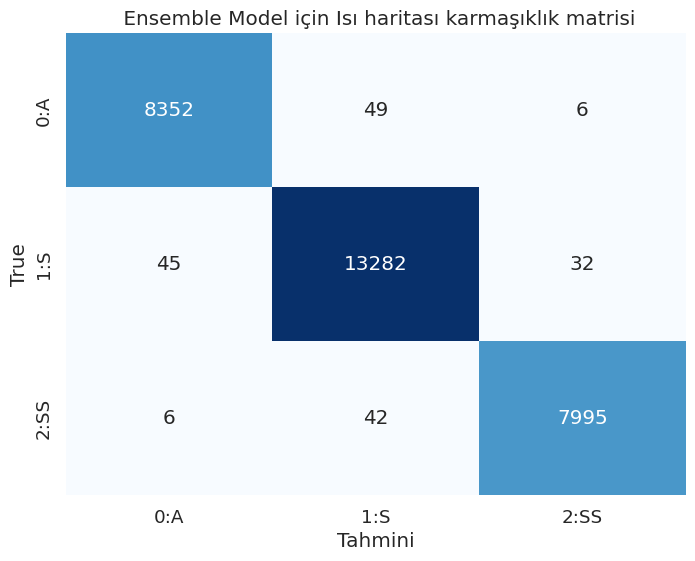

In [17]:
eb_accuracy = accuracy_score(pred, y_test)
eb_matrix = confusion_matrix(pred, y_test)
eb_report = classification_report(pred, y_test)

print('Ensemble Model doğruluğu: ', round(eb_accuracy, 3))
print('Ensemble Model karmaşıklık matrisi: ', eb_matrix)
print('Ensemble Model sınıflandırma raporu:', eb_report)

"""Bu kod parçası, topluluk modeli (clf) için Doğruluk (accuracy), Karışıklık Matrisi (confusion matrix) ve 
Sınıflandırma Raporu (classification report) değerlendirmelerini yapar ve yazdırır. Bu değerlendirmeler, 
modelin performansı hakkında bilgi sağlar. 

Kodun her bir parçası şu işlemleri gerçekleştirir: eb_accuracy fonksiyonu, topluluk modelinin tahminlerinin 
doğruluğunu, gerçek etiketlerle karşılaştırarak hesaplar. eb_matrix fonksiyonu, topluluk modelinin tahminleri 
için karışıklık matrisini hesaplar. Karışıklık matrisi, doğru pozitifler, doğru negatifler, yanlış pozitifler 
ve yanlış negatifler hakkında bilgi sağlar. eb_report fonksiyonu, topluluk modeli için bir sınıflandırma raporu 
oluşturur. Bu rapor, her sınıf için kesinlik, geri çağırma, F1 puanı ve destek gibi ölçütleri içerir. 
Son olarak, kod, topluluk modeli için doğruluk, karışıklık matrisi ve sınıflandırma raporunu yazdırır.

Bu kod parçası, farklı sınıfları sınıflandıran modelin performansını değerlendirmek için kullanılabilir."""



# Karışıklık matrisini bir ısı haritası olarak çizimi
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Daha iyi okunabilirlik için yazı tipi boyutunu ayarlanır
sns.heatmap(eb_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["0:A", "1:S", "2:SS"], yticklabels=["0:A", "1:S", "2:SS"])
plt.xlabel("Tahmini")
plt.ylabel("True")
plt.title(" Ensemble Model için Isı haritası karmaşıklık matrisi")
plt.show()





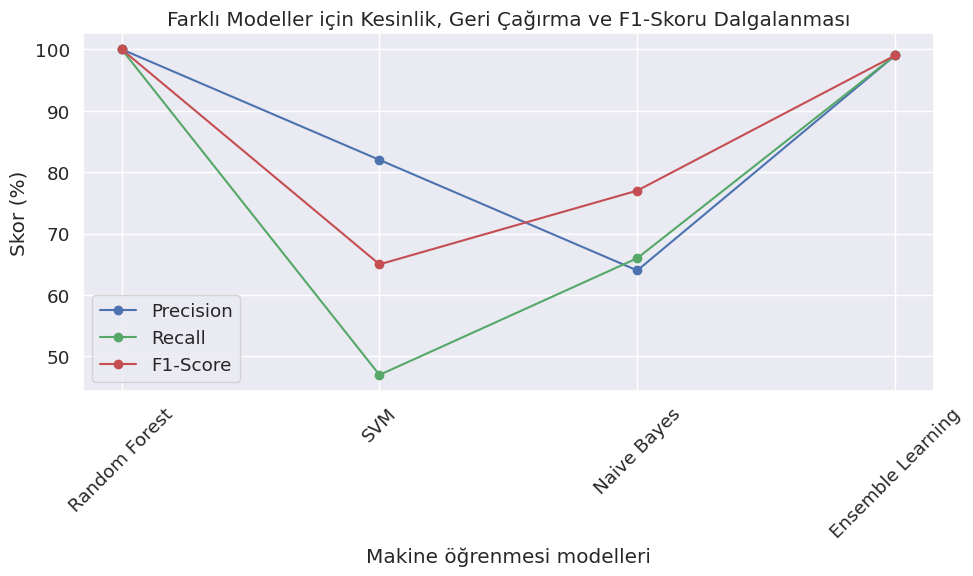

In [18]:
#Her modelin değerlendirme metriklerini tek şekilde çizim

# Model isimleri
models = ['Random Forest', 'SVM', 'Naive Bayes', 'Ensemble Learning']

# Precision scores
precision = [100, 82, 64, 99]

# Recall scores
recall = [100, 47, 66, 99]

# F1-score skorlar
f1_score = [100, 65, 77, 99]

# X-axis values (models)
x = range(len(models))

# Çizim için bir şekil ve eksen oluşturma
fig, ax = plt.subplots(figsize=(10, 6))

# Plot precision scores
ax.plot(x, precision, marker='o', linestyle='-', color='b', label='Precision')

# Plot recall scores
ax.plot(x, recall, marker='o', linestyle='-', color='g', label='Recall')

# Plot F1-score scores
ax.plot(x, f1_score, marker='o', linestyle='-', color='r', label='F1-Score')

# x-eksen işaret ve etiket
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45)
ax.set_xlabel('Makine öğrenmesi modelleri')

# y-eksen etiket
ax.set_ylabel('Skor (%)')

# çizim başlığı
ax.set_title('Farklı Modeller için Kesinlik, Geri Çağırma ve F1-Skoru Dalgalanması')

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.grid(True)
plt.show()

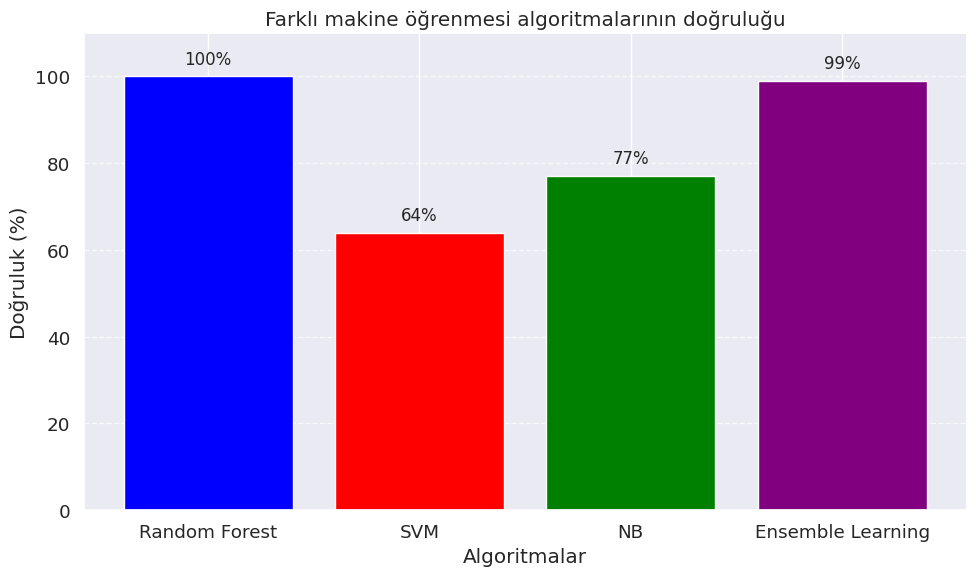

In [19]:
# Define the algorithms and their corresponding accuracies
algorithms = ['Random Forest', 'SVM', 'NB', 'Ensemble Learning']
accuracies = [100, 64, 77, 99]

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=['blue', 'red', 'green', 'purple'])
plt.ylim(0, 110)  # Set the y-axis limit for better visualization
plt.xlabel('Algoritmalar')
plt.ylabel('Doğruluk (%)')
plt.title("Farklı makine öğrenmesi algoritmalarının doğruluğu")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the accuracy values on top of the bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 2, str(v) + '%', ha='center', va='bottom', fontsize=12)

# Show the graph
plt.tight_layout()
plt.show()